# **Spam Text Classifire**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Data Visualisation Datasets/SPAM text message 20170820 - Data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## **Data Processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df["Message"].duplicated().sum()

415

In [ ]:
df = df.drop_duplicates()

In [ ]:
def update(cat):
    if cat == "spam":
        return 1
    elif cat == "ham":
        return 0
    return cat
df.loc[:, "Category"] = df["Category"].apply(update)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Analysing the Data**

In [ ]:
spam = len(df[df["Category"] == 1])

ham = len(df[df["Category"] == 0])
sz = len(df)

print("Percentage of spam emails = ", spam * 100 / sz)
print("Percentage of ham emails = ", ham * 100 / sz)

Percentage of spam emails =  12.4297071941051
Percentage of ham emails =  87.5702928058949


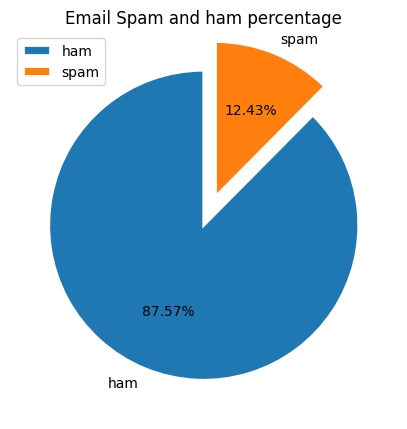

In [ ]:
valus = df["Category"].value_counts()

plt.figure(figsize=(5, 6))
plt.pie(
    valus,
    autopct="%0.2f%%",
    labels=["ham", "spam"],
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
    explode=[0, 0.2],
    startangle=90,
)
plt.title("Email Spam and ham percentage")
plt.legend()
plt.show()

In [ ]:
data = df[:1000]
data.shape

(1000, 2)

## **TF-IDF Vectorizer**

In [ ]:
docs = list(data['Message'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
X = docs
y = data['Category']
print(X.shape, y.shape)

(1000, 3379) (1000,)


## **Train Test Split**

In [ ]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

(800, 3379) (800,)
(200, 3379) (200,)


## **Classifire Models**

01. Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.98625
Testing Accuracy score: 0.93


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['spam', 'ham']))

              precision    recall  f1-score   support

        spam       0.96      0.95      0.96       170
         ham       0.75      0.80      0.77        30

    accuracy                           0.93       200
   macro avg       0.86      0.88      0.87       200
weighted avg       0.93      0.93      0.93       200



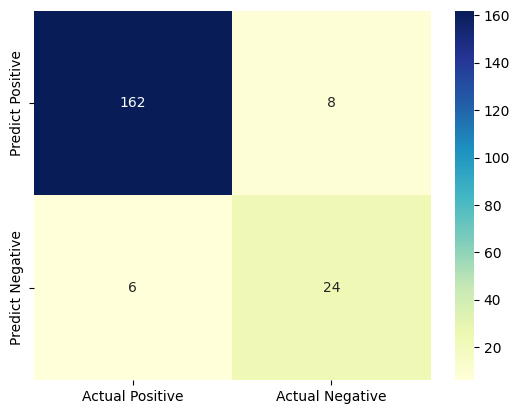

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

02. Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.94875
Testing Accuracy score: 0.9


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['spam', 'ham']))

              precision    recall  f1-score   support

        spam       0.89      1.00      0.94       170
         ham       1.00      0.33      0.50        30

    accuracy                           0.90       200
   macro avg       0.95      0.67      0.72       200
weighted avg       0.91      0.90      0.88       200



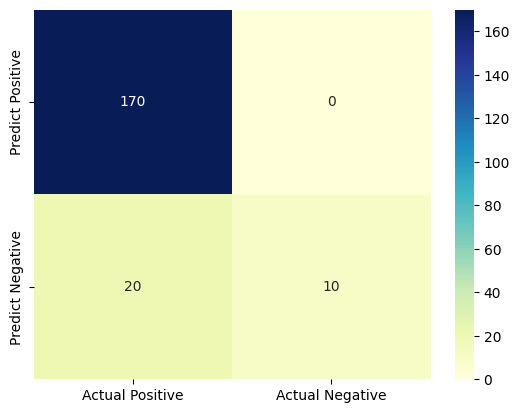

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

03. Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.91
Testing Accuracy score: 0.885


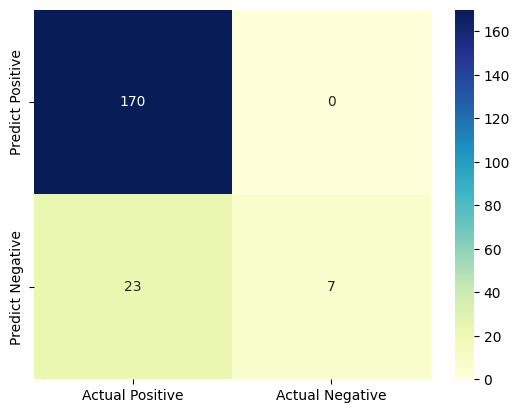

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['spam', 'ham']))

              precision    recall  f1-score   support

        spam       0.88      1.00      0.94       170
         ham       1.00      0.23      0.38        30

    accuracy                           0.89       200
   macro avg       0.94      0.62      0.66       200
weighted avg       0.90      0.89      0.85       200



04. Support Vector Machine

In [ ]:
svc =  LinearSVC(class_weight='balanced')
svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.99875
Testing Accuracy score: 0.985


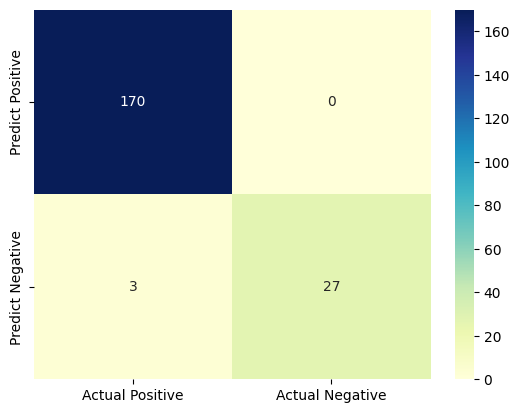

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['spam', 'ham']))

              precision    recall  f1-score   support

        spam       0.98      1.00      0.99       170
         ham       1.00      0.90      0.95        30

    accuracy                           0.98       200
   macro avg       0.99      0.95      0.97       200
weighted avg       0.99      0.98      0.98       200



05. Decision Tree Classifire

In [ ]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 1.0
Testing Accuracy score: 0.97


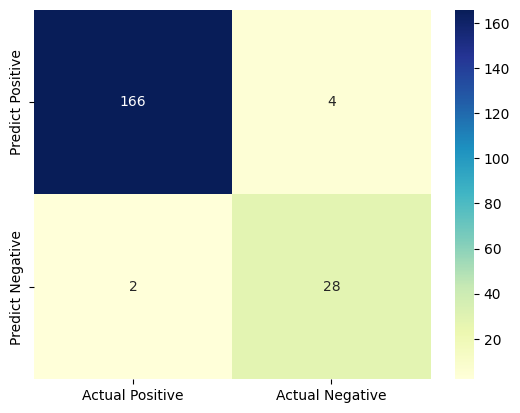

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['spam', 'ham']))

              precision    recall  f1-score   support

        spam       0.99      0.98      0.98       170
         ham       0.88      0.93      0.90        30

    accuracy                           0.97       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.97      0.97      0.97       200



## **Model Accuracy Comaprison**

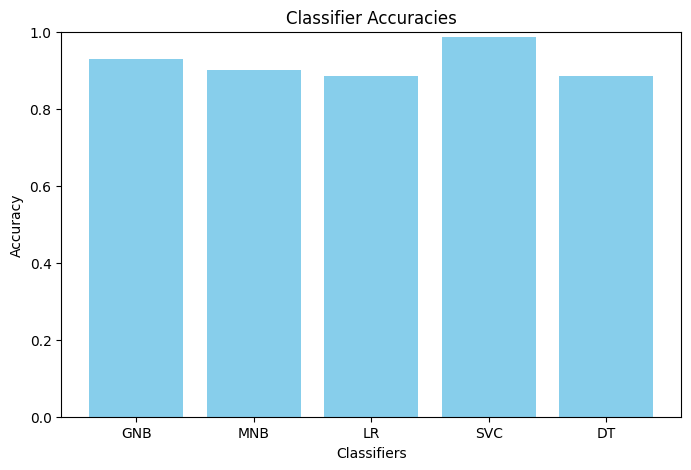

In [ ]:
import matplotlib.pyplot as plt

classifiers = ['GNB', 'MNB', 'LR', 'SVC', 'DT']
accuracies = [gnb_accuracy, mnb_accuracy, lr_accuracy, svc_accuracy, lr_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.ylim(0, 1)
plt.show()